In [9]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import textdistance as td
import seaborn as sns
pd.set_option('display.max_colwidth', None)
from sklearn.metrics import confusion_matrix
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
import typing
import math

In [2]:
df = pd.read_csv("./satisfactoryFilledWithMED.csv")

Question:
Is MED related to whether the predicted explanation makes sense?

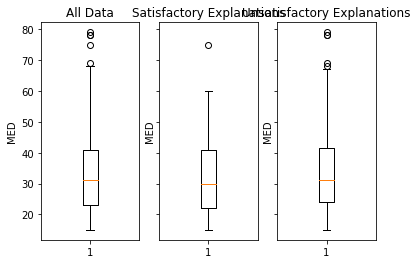

In [6]:

satisfactoryRows = df[df['satisfactory_score'] == 1]
unsatisfactoryRows = df[df['satisfactory_score'] == 0]

# Create boxplots for MED of satisfactory score 1 and 0
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True)

ax0.boxplot(df['smallestMED'])
ax0.set_title('All Data')
ax0.set_ylabel('MED')
ax1.boxplot(satisfactoryRows['smallestMED'])
ax1.set_title('Satisfactory Explanations')
ax1.set_ylabel('MED')
ax2.boxplot(unsatisfactoryRows['smallestMED'])
ax2.set_title('Unsatisfactory Explanations')
ax2.set_ylabel('MED')
plt.show()

Question:
How is correctness of the predicted label related to if the explanation makes sense?

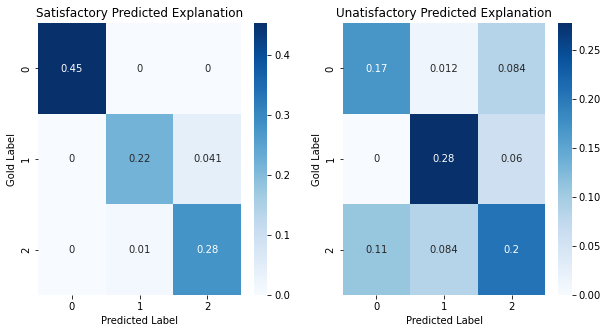

In [12]:

# Create confusion matrices for each subgroup
confusion_matrix_1 = confusion_matrix(satisfactoryRows['gold_label'], satisfactoryRows['pred_label'], normalize='all')
confusion_matrix_0 = confusion_matrix(unsatisfactoryRows['gold_label'], unsatisfactoryRows['pred_label'], normalize='all')

# Plot the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix_1, annot=True, cmap='Blues', ax=ax[0])
sns.heatmap(confusion_matrix_0, annot=True, cmap='Blues', ax=ax[1])

# Set the axis labels and title
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('Gold Label')
ax[0].set_title('Satisfactory Predicted Explanation')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('Gold Label')
ax[1].set_title('Unatisfactory Predicted Explanation')
plt.show()